In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv("titanic_train.csv")

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.shape

(891, 12)

In [41]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is a skewness present in Pclass,Age,SibSp,Parch and Fare Fields.
There are outliers present in PassengerId,Age,SibSp,Parch and Fare.

In [45]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


null parameters are present in the dataframe.

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Thera is a Nan values present in Age,Cabin and Embarked field. 

In [47]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [48]:
df['Age'].isnull().sum()

0

In [49]:
df['Cabin'].isnull().sum()

0

In [50]:
df['Embarked'].isnull().sum()

0

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [52]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

All null values are removed.now we change the String values into numeric of Object Columns.

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'].astype(str))
df['Cabin']=le.fit_transform(df['Cabin'].astype(str))
df['Sex']=le.fit_transform(df['Sex'].astype(str))

In [54]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [55]:
df['Cabin']

0      47
1      81
2      47
3      55
4      47
       ..
886    47
887    30
888    47
889    60
890    47
Name: Cabin, Length: 891, dtype: int32

In [56]:
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,47,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,47,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,47,2


we will drop the 'Name' and 'Ticket'Field.

In [58]:
df.drop('Name',axis=1,inplace=True)

In [59]:
df.drop('Ticket',axis=1,inplace=True)

In [60]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,47,2
1,2,1,1,0,38.0,1,0,71.2833,81,0
2,3,1,3,0,26.0,0,0,7.9250,47,2
3,4,1,1,0,35.0,1,0,53.1000,55,2
4,5,0,3,1,35.0,0,0,8.0500,47,2


In [61]:
df_cor=df.corr()
df_cor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036186,-0.057527,-0.001652,0.012658,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500,-0.248495,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333,-0.102643,0.108262
Age,0.036186,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554,0.070389,-0.000020
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651,-0.005539,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225,0.022682,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000,0.090516,-0.224719
Cabin,-0.018086,0.175690,-0.248495,-0.102643,0.070389,-0.005539,0.022682,0.090516,1.000000,0.023804
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.000020,0.068230,0.039798,-0.224719,0.023804,1.000000


Survived field is highly correlated with  Fare.
Survived field is least correlated with Sex.

<AxesSubplot:>

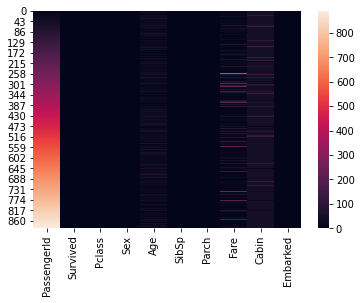

In [62]:
sns.heatmap(df)

There is no null values in dataframe.

<AxesSubplot:>

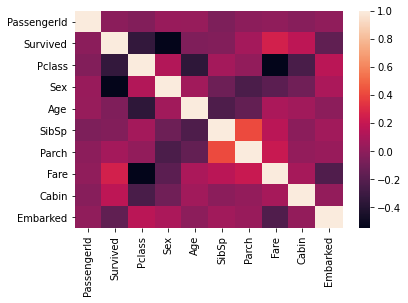

In [63]:
sns.heatmap(df_cor)

<AxesSubplot:>

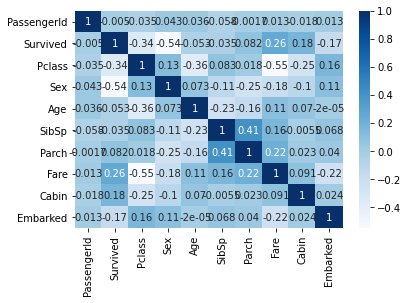

In [64]:
plt.figure(figsize=(6,4))
sns.heatmap(df_cor,cmap='Blues',annot=True)

<AxesSubplot:>

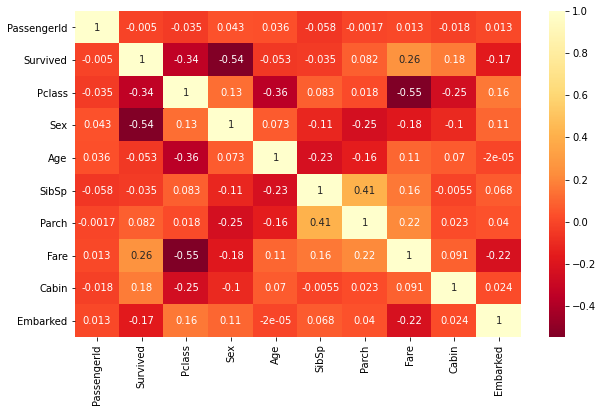

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='YlOrRd_r', annot=True)

Survived is highly correlated with Fare and least related with Sex.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

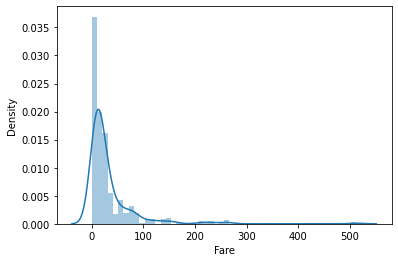

In [66]:
sns.distplot(df['Fare'])

skewness is present in this graph.

<AxesSubplot:xlabel='Sex', ylabel='Density'>

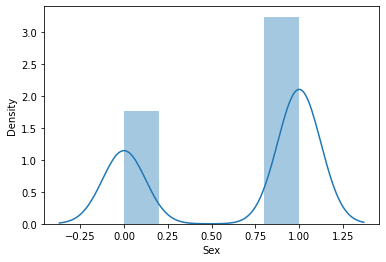

In [67]:
sns.distplot(df['Sex'])

skewness is present in Sex field.

<AxesSubplot:xlabel='Age', ylabel='Density'>

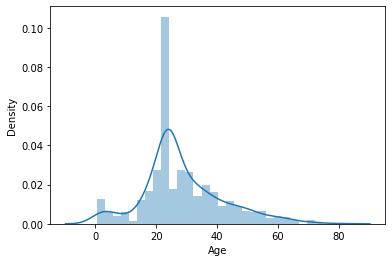

In [68]:
sns.distplot(df['Age'])

No skewness present.

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

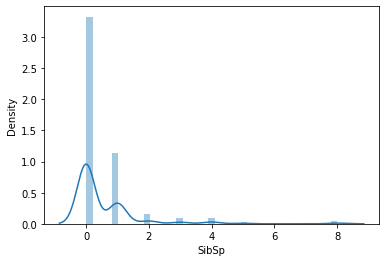

In [69]:
sns.distplot(df['SibSp'])

skewness is present in SibSp field.

<AxesSubplot:xlabel='Parch', ylabel='Density'>

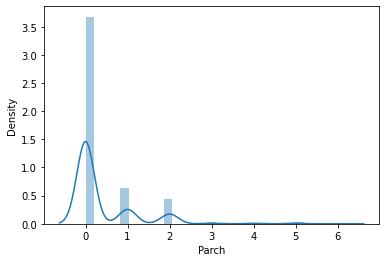

In [70]:
sns.distplot(df['Parch'])

skewness is present in Parch field.

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

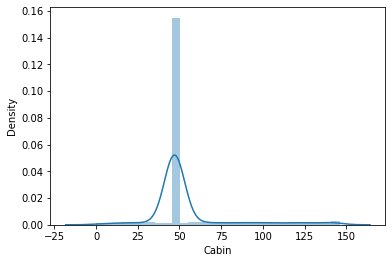

In [71]:
sns.distplot(df['Cabin'])

skewness is present in Cabin field. 

In [72]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.657753
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Cabin          2.268926
Embarked      -1.264823
dtype: float64

skewness is present in Pclass,Sex,Sibsp,Parch,fare,cabin and Embarked.

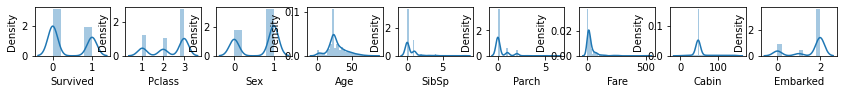

In [73]:
collist=df.columns.values
ncol=10
nrows=15
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

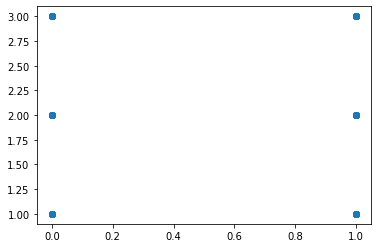

In [74]:
plt.scatter(df['Survived'],df['Pclass'])

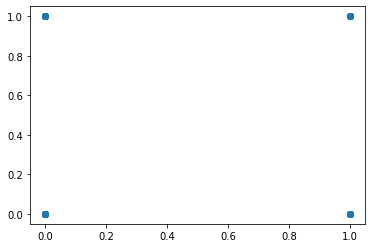

In [75]:
plt.scatter(df['Survived'],df['Sex'])

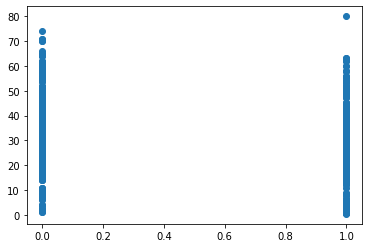

In [76]:
plt.scatter(df['Survived'],df['Age'])

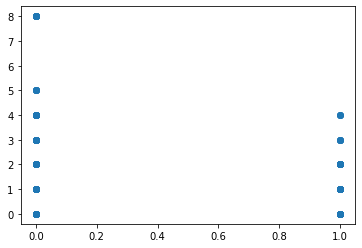

In [77]:
plt.scatter(df['Survived'],df['SibSp'])

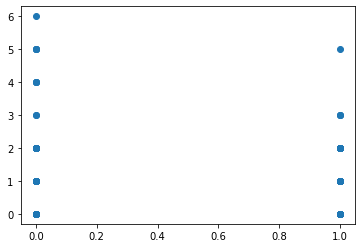

In [78]:
plt.scatter(df['Survived'],df['Parch'])

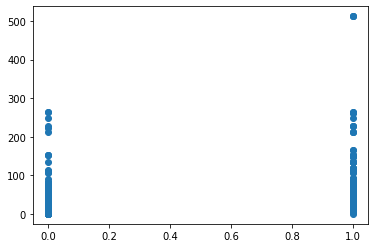

In [79]:
plt.scatter(df['Survived'],df['Fare'])

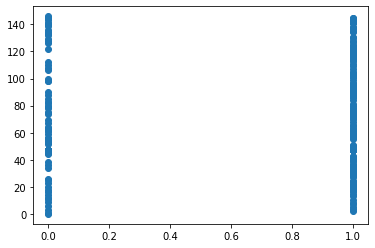

In [80]:
plt.scatter(df['Survived'],df['Cabin'])

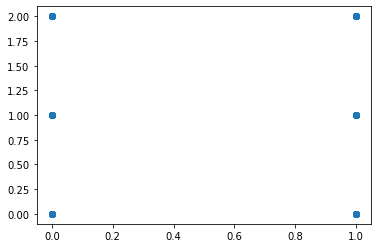

In [81]:
plt.scatter(df['Survived'],df['Embarked'])

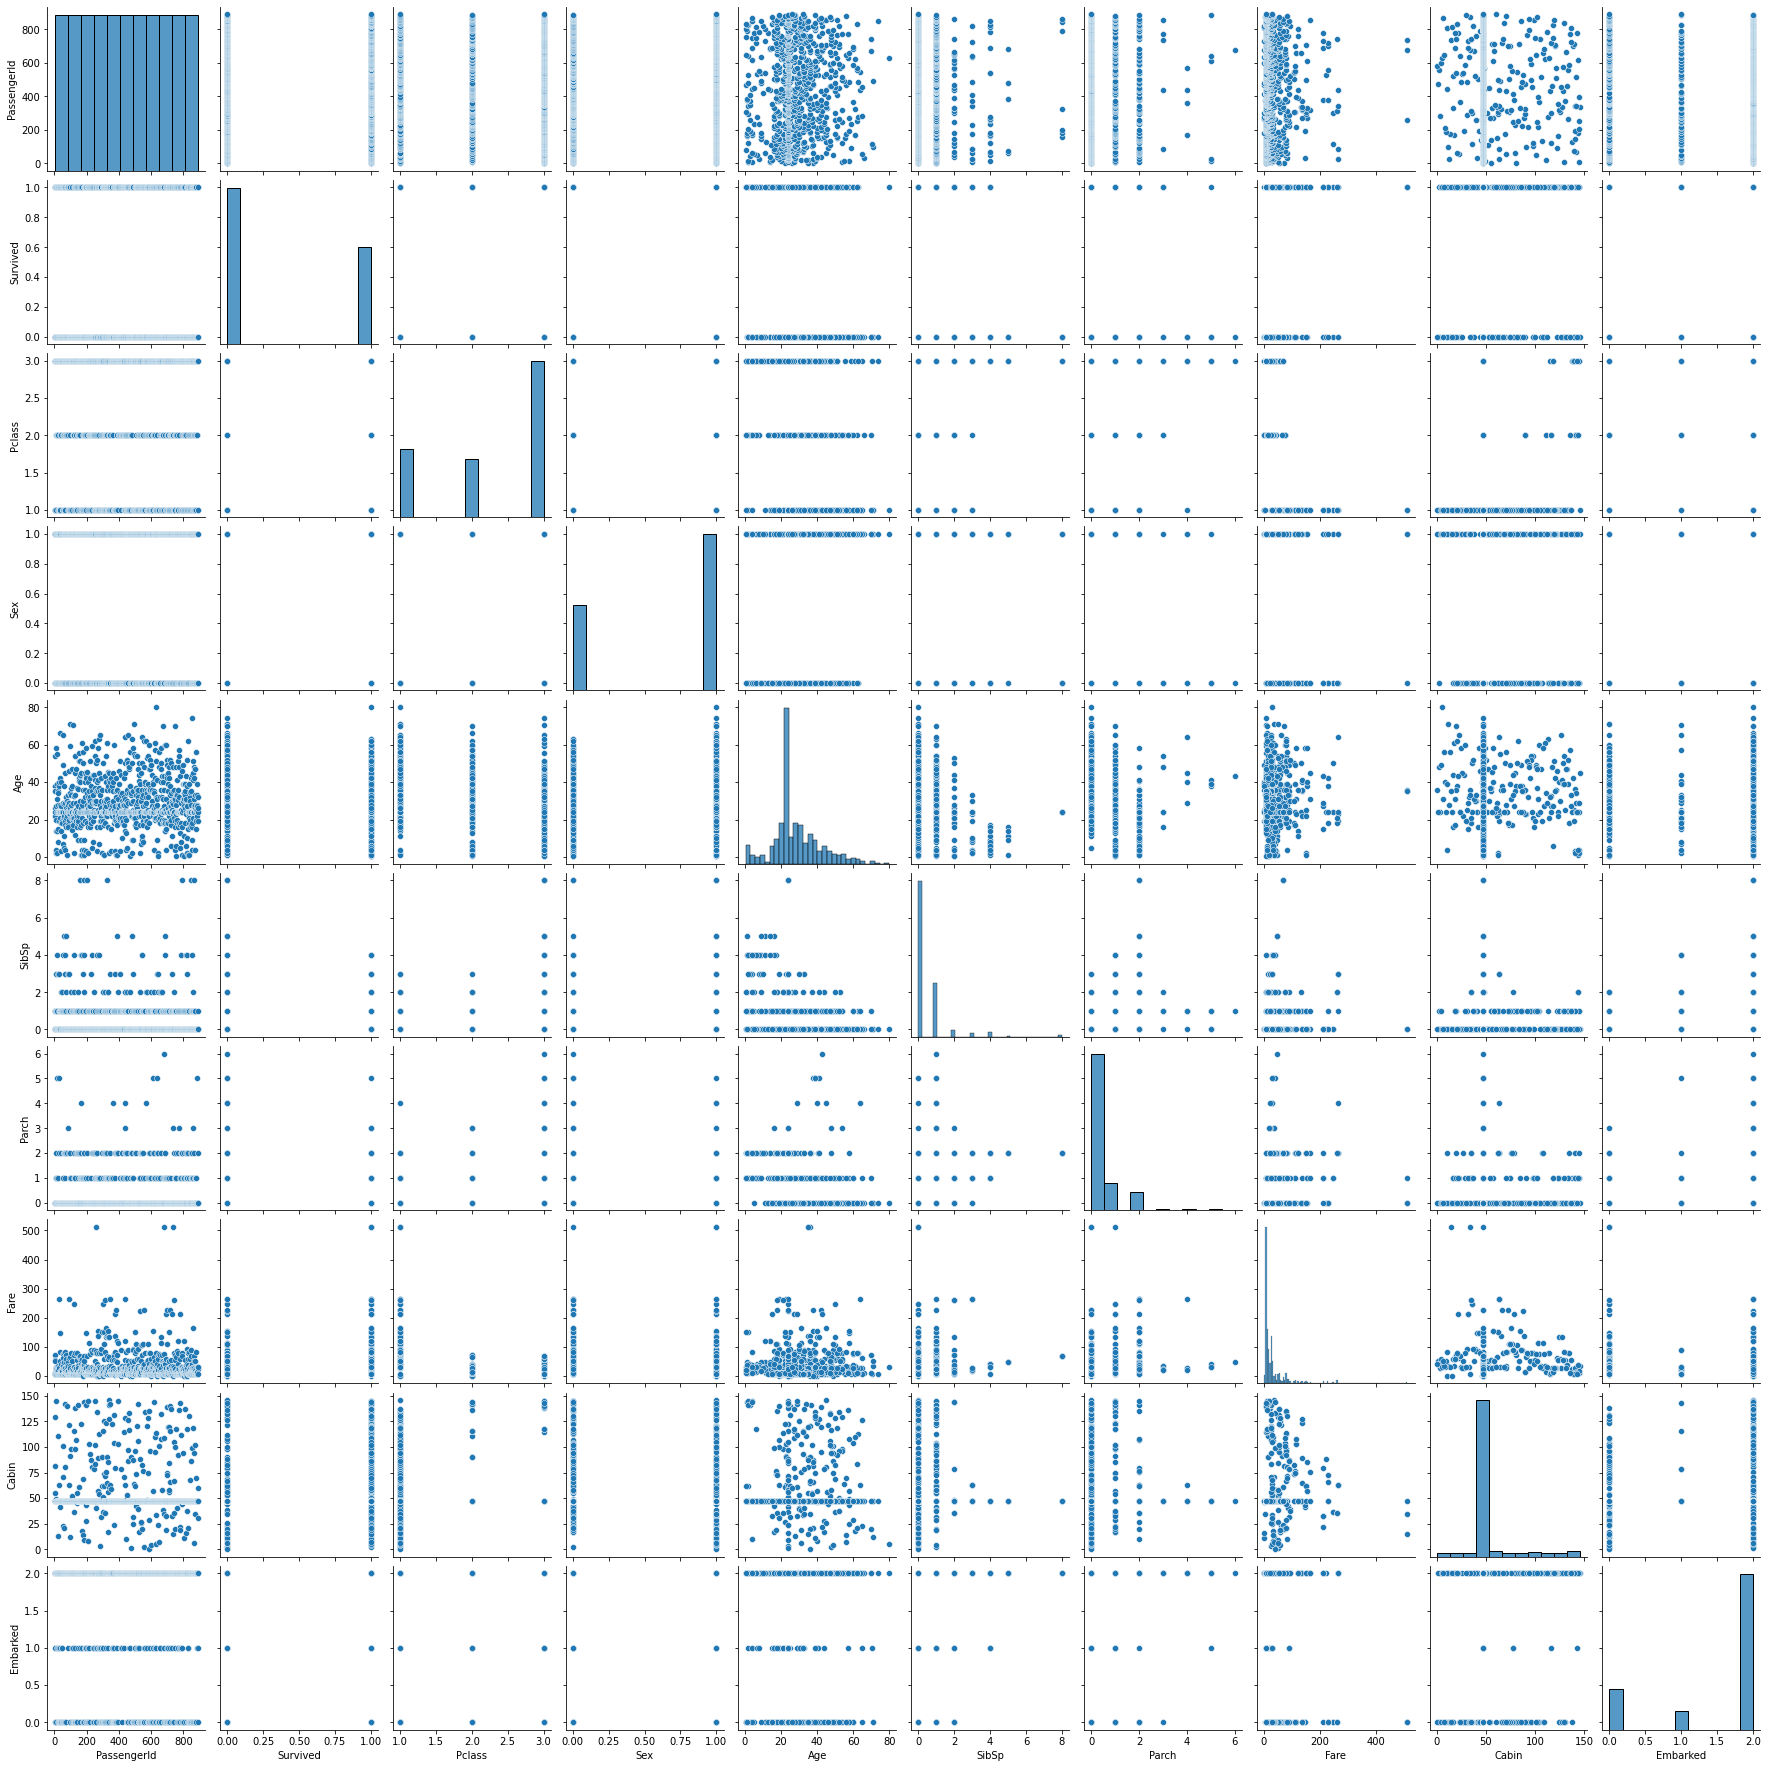

In [82]:
sns.pairplot(df)

In [83]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

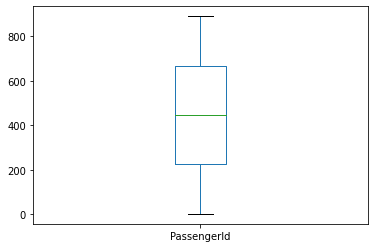

In [84]:
df['PassengerId'].plot.box()

 no outliers are present.

<AxesSubplot:>

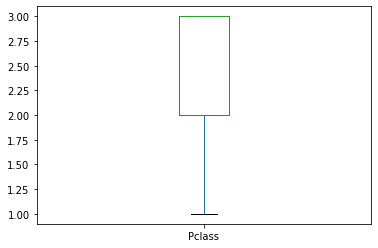

In [85]:
df['Pclass'].plot.box()

No outliers are present.

<AxesSubplot:>

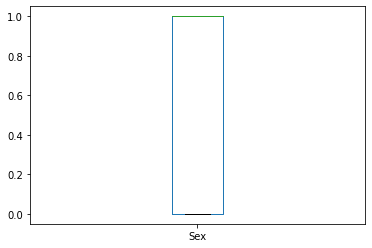

In [86]:
df['Sex'].plot.box()

No outliers are present.

<AxesSubplot:>

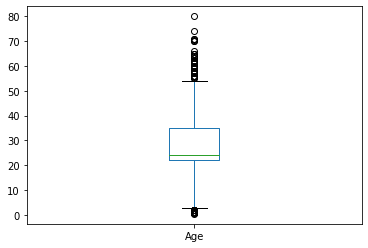

In [87]:
df['Age'].plot.box()

Outliers are present.

<AxesSubplot:>

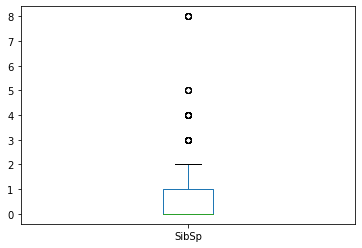

In [88]:
df['SibSp'].plot.box()

outliers are present.

<AxesSubplot:>

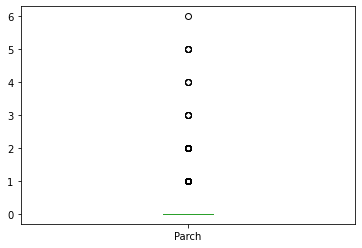

In [89]:
df['Parch'].plot.box()

outliers are present.

<AxesSubplot:>

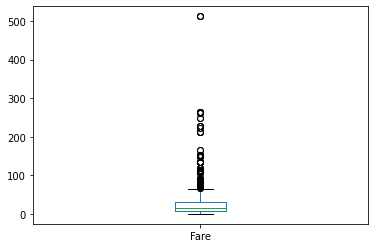

In [90]:
df['Fare'].plot.box()

outliers are present.

<AxesSubplot:>

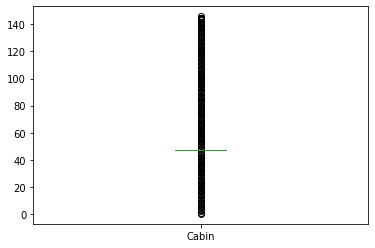

In [91]:
df['Cabin'].plot.box()

outliers are present.

<AxesSubplot:>

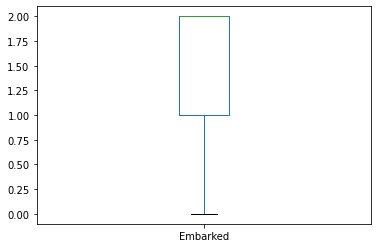

In [92]:
df['Embarked'].plot.box()

No outliers are present.

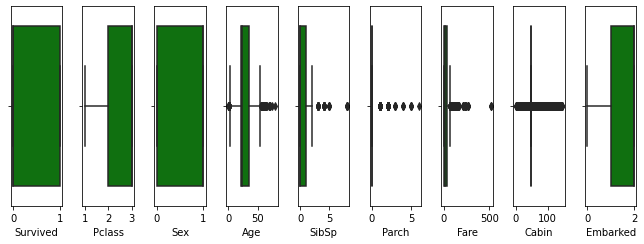

In [93]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

outliers are present in Age,SibSp,Parch,Fare and Cabin columns.

# Removing Skewness

In [94]:
df['Pclass']=np.log1p(df['Pclass'])

In [95]:
df['Sex']=np.log1p(df['Sex'])

In [96]:
df['SibSp']=np.log1p(df['SibSp'])

In [97]:
df['Parch']=np.log1p(df['Parch'])

In [98]:
df['Fare']=np.log1p(df['Fare'])

In [99]:
df['Cabin']=np.log1p(df['Cabin'])

In [100]:
df['Embarked']=np.log1p(df['Embarked'])

In [101]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.772196
Sex           -0.618921
Age            0.657753
SibSp          1.661245
Parch          1.675439
Fare           0.394928
Cabin         -2.130144
Embarked      -1.387098
dtype: float64

In [102]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [103]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,1.386294,0.693147,22.0,0.693147,0.0,2.110213,3.871201,1.098612
1,2,1,0.693147,0.000000,38.0,0.693147,0.0,4.280593,4.406719,0.000000
2,3,1,1.386294,0.000000,26.0,0.000000,0.0,2.188856,3.871201,1.098612
3,4,1,0.693147,0.000000,35.0,0.693147,0.0,3.990834,4.025352,1.098612
4,5,0,1.386294,0.693147,35.0,0.000000,0.0,2.202765,3.871201,1.098612


In [104]:
df.drop('PassengerId',axis=1,inplace=True)

In [105]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1.386294,0.693147,22.0,0.693147,0.0,2.110213,3.871201,1.098612
1,1,0.693147,0.000000,38.0,0.693147,0.0,4.280593,4.406719,0.000000
2,1,1.386294,0.000000,26.0,0.000000,0.0,2.188856,3.871201,1.098612
3,1,0.693147,0.000000,35.0,0.693147,0.0,3.990834,4.025352,1.098612
4,0,1.386294,0.693147,35.0,0.000000,0.0,2.202765,3.871201,1.098612


# Removing Outliers

In [106]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 13,  23,  25,  59,  71,  96,  96, 116, 159, 167, 179, 180, 185,
       201, 209, 258, 263, 271, 277, 284, 302, 324, 360, 386, 413, 438,
       445, 466, 475, 480, 481, 493, 556, 567, 583, 597, 599, 610, 630,
       630, 633, 638, 647, 672, 674, 678, 679, 683, 732, 737, 745, 792,
       806, 806, 815, 822, 846, 851, 863, 867, 885], dtype=int64), array([5, 7, 5, 4, 4, 3, 7, 3, 4, 5, 6, 4, 7, 4, 7, 6, 6, 6, 6, 7, 6, 4,
       5, 4, 6, 5, 7, 6, 7, 4, 6, 3, 7, 5, 7, 6, 7, 5, 3, 7, 6, 5, 7, 3,
       6, 5, 6, 4, 6, 6, 3, 4, 6, 7, 6, 6, 4, 3, 4, 7, 5], dtype=int64))


In [107]:
z[13][5]

3.8256905414558133

In [108]:
z[885][5]

3.8256905414558133

In [109]:
df_new=df[(z<3).all(axis=1)]

In [110]:
df_new.shape

(833, 9)

In [111]:
df.shape

(891, 9)

891-833=58outliers are removed from dataframe.

In [112]:
x=df_new.iloc[:,1:9]
y=df_new.iloc[:,0]

In [113]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)

In [135]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.386294,0.693147,22.0,0.693147,0.000000,2.110213,3.871201,1.098612
1,0.693147,0.000000,38.0,0.693147,0.000000,4.280593,4.406719,0.000000
2,1.386294,0.000000,26.0,0.000000,0.000000,2.188856,3.871201,1.098612
3,0.693147,0.000000,35.0,0.693147,0.000000,3.990834,4.025352,1.098612
4,1.386294,0.693147,35.0,0.000000,0.000000,2.202765,3.871201,1.098612
...,...,...,...,...,...,...,...,...
886,1.098612,0.693147,27.0,0.000000,0.000000,2.639057,3.871201,1.098612
887,0.693147,0.000000,19.0,0.000000,0.000000,3.433987,3.433987,1.098612
888,1.386294,0.000000,24.0,0.693147,1.098612,3.196630,3.871201,1.098612
889,0.693147,0.693147,26.0,0.000000,0.000000,3.433987,4.110874,0.000000


In [136]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 833, dtype: int64

In [139]:
def getScore(m):
    max_score=0
    max_i=0
    for i in range(0,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        m.fit(x_train,y_train)
        pred=m.predict(x_test)
        acc=accuracy_score(y_test,pred)
        if(acc>max_score):
            max_score=acc
            max_i=i
           
    print("max score",max_score)
    print("max i",max_i)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=max_i)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))


In [140]:
getScore(lr)

max score 0.8436363636363636
max i 63
[[146  21]
 [ 22  86]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       167
           1       0.80      0.80      0.80       108

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



In [141]:
dt=DecisionTreeClassifier()
getScore(dt)

max score 0.8363636363636363
max i 102
[[153  24]
 [ 22  76]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       177
           1       0.76      0.78      0.77        98

    accuracy                           0.83       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.83      0.83      0.83       275



In [142]:
gnb=GaussianNB()
getScore(gnb)

max score 0.8072727272727273
max i 179
[[149  19]
 [ 34  73]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       168
           1       0.79      0.68      0.73       107

    accuracy                           0.81       275
   macro avg       0.80      0.78      0.79       275
weighted avg       0.81      0.81      0.80       275



# Cross validation

In [143]:
score=cross_val_score(lr,x,y,cv=8)
print(score)
print(score.mean(),score.std())

[0.8        0.77142857 0.81730769 0.77884615 0.75961538 0.76923077
 0.80769231 0.81553398]
0.7899568574629254 0.021314869008615442


In [144]:
score=cross_val_score(dt,x,y,cv=8)
print(score)
print(score.mean(),score.std())

[0.72380952 0.74285714 0.78846154 0.83653846 0.77884615 0.82692308
 0.82692308 0.76699029]
0.7864186582026388 0.03880994961151992


In [145]:
score=cross_val_score(gnb,x,y,cv=7)
print(score)
print(score.mean(),score.std())

[0.675      0.7394958  0.71428571 0.80672269 0.78991597 0.77310924
 0.8220339 ]
0.7600804728671129 0.04903818395946689


# Hyper Parameter Tuning

In [146]:
 from sklearn.model_selection import GridSearchCV
p={'criterion':['gini','entropy']}
g=GridSearchCV(dt,p,cv=5)
g.fit(x,y)
print("best params:",g.best_params_)
g.best_score_

best params: {'criterion': 'gini'}


0.7995198079231692

# AUC ROC CURVE

In [121]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [122]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [123]:
y_pred_prob

array([0.92568913, 0.57985078, 0.43539583, 0.15700052, 0.26729619,
       0.14733947, 0.13758673, 0.16421713, 0.1477834 , 0.13713841,
       0.63503485, 0.72624418, 0.179567  , 0.14843872, 0.14868045,
       0.61667349, 0.1557501 , 0.93778691, 0.59435048, 0.95710975,
       0.12087248, 0.15637645, 0.62330222, 0.68418956, 0.86884505,
       0.1456462 , 0.33649892, 0.18736433, 0.12361595, 0.73136014,
       0.67133103, 0.53518268, 0.07561052, 0.11867207, 0.11601948,
       0.65398974, 0.10948294, 0.93195385, 0.93245896, 0.15914972,
       0.92848788, 0.16419546, 0.73521454, 0.14786594, 0.68380067,
       0.18557404, 0.17060633, 0.11234304, 0.04989941, 0.64918976,
       0.35173588, 0.11527345, 0.18010972, 0.18168965, 0.20730243,
       0.15163188, 0.11092479, 0.12727531, 0.91025055, 0.76126927,
       0.16421484, 0.61736531, 0.08227262, 0.1479304 , 0.6951021 ,
       0.1483751 , 0.25731976, 0.20317055, 0.89051361, 0.78004494,
       0.95317264, 0.92341846, 0.75932749, 0.63503485, 0.12800

In [124]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [125]:
fpr

array([0.     , 0.     , 0.     , 0.00625, 0.00625, 0.025  , 0.025  ,
       0.03125, 0.03125, 0.0375 , 0.0375 , 0.04375, 0.04375, 0.05   ,
       0.05   , 0.05   , 0.05   , 0.05625, 0.05625, 0.0625 , 0.0625 ,
       0.06875, 0.06875, 0.1    , 0.1    , 0.1125 , 0.1125 , 0.11875,
       0.11875, 0.125  , 0.125  , 0.1375 , 0.1375 , 0.14375, 0.14375,
       0.15   , 0.15   , 0.16875, 0.16875, 0.175  , 0.175  , 0.1875 ,
       0.1875 , 0.19375, 0.19375, 0.23125, 0.23125, 0.2375 , 0.2375 ,
       0.24375, 0.24375, 0.28125, 0.28125, 0.30625, 0.30625, 0.34375,
       0.34375, 0.35625, 0.3625 , 0.4125 , 0.4125 , 0.45   , 0.45   ,
       0.475  , 0.475  , 0.4875 , 0.4875 , 0.625  , 0.625  , 0.63125,
       0.63125, 0.6375 , 0.65   , 0.70625, 0.73125, 0.7375 , 0.7375 ,
       0.75   , 0.75   , 0.76875, 0.76875, 0.78125, 0.78125, 0.85625,
       0.85625, 0.8625 , 0.86875, 0.86875, 0.95   , 0.95   , 0.95625,
       0.95625, 1.     ])

In [126]:
tpr

array([0.        , 0.00869565, 0.17391304, 0.17391304, 0.35652174,
       0.35652174, 0.4       , 0.4       , 0.40869565, 0.40869565,
       0.4173913 , 0.4173913 , 0.46086957, 0.46086957, 0.48695652,
       0.50434783, 0.52173913, 0.52173913, 0.53913043, 0.53913043,
       0.54782609, 0.54782609, 0.55652174, 0.55652174, 0.57391304,
       0.57391304, 0.5826087 , 0.5826087 , 0.6       , 0.63478261,
       0.66086957, 0.66086957, 0.66956522, 0.66956522, 0.67826087,
       0.67826087, 0.68695652, 0.68695652, 0.69565217, 0.69565217,
       0.70434783, 0.70434783, 0.72173913, 0.72173913, 0.73913043,
       0.73913043, 0.77391304, 0.77391304, 0.7826087 , 0.7826087 ,
       0.79130435, 0.79130435, 0.8       , 0.8       , 0.83478261,
       0.83478261, 0.84347826, 0.84347826, 0.85217391, 0.85217391,
       0.86956522, 0.86956522, 0.87826087, 0.87826087, 0.88695652,
       0.88695652, 0.89565217, 0.89565217, 0.90434783, 0.90434783,
       0.91304348, 0.91304348, 0.91304348, 0.91304348, 0.91304

In [127]:
thresholds

array([1.95710975, 0.95710975, 0.89051361, 0.88956896, 0.79169824,
       0.78004494, 0.76871157, 0.76126927, 0.75932749, 0.75634648,
       0.74976574, 0.73729711, 0.72859507, 0.7263405 , 0.72502302,
       0.72395436, 0.70803065, 0.70572188, 0.6951021 , 0.69475799,
       0.68704342, 0.68418956, 0.68380067, 0.65398974, 0.64918976,
       0.64640067, 0.64495875, 0.64408367, 0.63597441, 0.63503485,
       0.62473444, 0.62288705, 0.62050917, 0.61736531, 0.61667349,
       0.61519768, 0.60917633, 0.57985078, 0.55976028, 0.53518268,
       0.48825526, 0.46960965, 0.46386042, 0.45433024, 0.43891483,
       0.4024685 , 0.36277344, 0.35623001, 0.35173588, 0.33649892,
       0.31009041, 0.26729619, 0.26193349, 0.25242236, 0.24271259,
       0.22135768, 0.22061435, 0.21150362, 0.21097159, 0.18736433,
       0.18557404, 0.17703846, 0.17486484, 0.16864291, 0.16822361,
       0.16421713, 0.16421484, 0.1483751 , 0.1479304 , 0.14788258,
       0.14786594, 0.1477834 , 0.14738917, 0.13815198, 0.13758

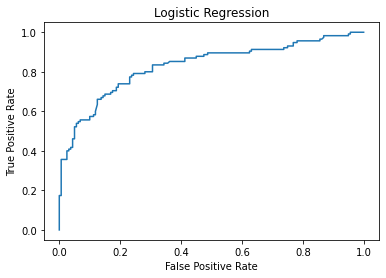

In [128]:

plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [129]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.7603260869565217


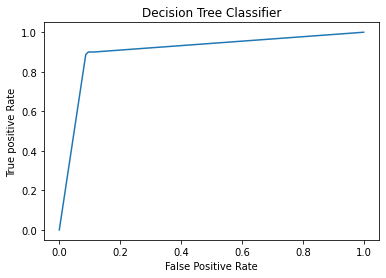

0.8934782608695653

In [130]:
#Decision Tree Curve
y_pred_prob=dt.predict_proba(x_test)[:,0]
tpr,fpr,threshold=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

# Ensemble Techniques

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rf=RandomForestClassifier(n_estimators=100,random_state=42)
#by default n_estimators=100
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8036363636363636
[[138  22]
 [ 32  83]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       160
           1       0.79      0.72      0.75       115

    accuracy                           0.80       275
   macro avg       0.80      0.79      0.80       275
weighted avg       0.80      0.80      0.80       275



# Saving the model

DecisionTree Classifier is performing as a best model.so we will save this model.

In [132]:
import joblib
joblib.dump(dt,'dtfile.obj')

['dtfile.obj']

In [133]:
file=joblib.load('dtfile.obj')

In [134]:
file.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)